<a href="https://colab.research.google.com/github/israr768/titanic-dataset-trained/blob/main/TITANIC_DATA_USING_DECISIONTREECLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
nikhilreddyvantari_titanic_dataset_using_decision_tree_classifier_path = kagglehub.dataset_download('nikhilreddyvantari/titanic-dataset-using-decision-tree-classifier')

print('Data source import complete.')


Data source import complete.


In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [72]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [73]:
titanic = pd.read_csv('titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [74]:
titanic.shape

(891, 12)

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [77]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [78]:
df = titanic.drop(['Name', 'Age','Ticket','PassengerId'], axis =1)

In [79]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,1,0,7.2500,NaN,S
1,1,1,female,1,0,71.2833,C85,C
2,1,3,female,0,0,7.9250,NaN,S
3,1,1,female,1,0,53.1000,C123,S
4,0,3,male,0,0,8.0500,NaN,S


In [80]:
df.isnull().sum()/len(df)*100

,0
Survived,0.000000
Pclass,0.000000
Sex,0.000000
SibSp,0.000000
Parch,0.000000
Fare,0.000000
Cabin,77.104377
Embarked,0.224467


In [81]:
df.drop('Cabin', axis=1, inplace =True)

In [82]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [83]:
df['Embarked'] = np.where(df['Embarked']== 'nan','S',df['Embarked'])

In [85]:
df.dropna()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.2500,S
1,1,1,0,1,0,71.2833,C
2,1,3,0,0,0,7.9250,S
3,1,1,0,1,0,53.1000,S
4,0,3,1,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,1,0,0,13.0000,S
887,1,1,0,0,0,30.0000,S
888,0,3,0,1,2,23.4500,S
889,1,1,1,0,0,30.0000,C


In [84]:
from sklearn.preprocessing import LabelEncoder
lm = LabelEncoder()

df['Sex'] = lm.fit_transform(df['Sex'])

In [86]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.2500,S
1,1,1,0,1,0,71.2833,C
2,1,3,0,0,0,7.9250,S
3,1,1,0,1,0,53.1000,S
4,0,3,1,0,0,8.0500,S


In [87]:
df_dummy = pd.get_dummies(df['Embarked'], drop_first = True)
print(df_dummy)

         Q      S
0    False   True
1    False  False
2    False   True
3    False   True
4    False   True
..     ...    ...
886  False   True
887  False   True
888  False   True
889  False  False
890   True  False

[891 rows x 2 columns]


In [88]:
data = pd.concat([df, df_dummy], axis=1)
data

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Q,S
0,0,3,1,1,0,7.2500,S,False,True
1,1,1,0,1,0,71.2833,C,False,False
2,1,3,0,0,0,7.9250,S,False,True
3,1,1,0,1,0,53.1000,S,False,True
4,0,3,1,0,0,8.0500,S,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,13.0000,S,False,True
887,1,1,0,0,0,30.0000,S,False,True
888,0,3,0,1,2,23.4500,S,False,True
889,1,1,1,0,0,30.0000,C,False,False


In [89]:
data.drop('Embarked', axis=1)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Q,S
0,0,3,1,1,0,7.2500,False,True
1,1,1,0,1,0,71.2833,False,False
2,1,3,0,0,0,7.9250,False,True
3,1,1,0,1,0,53.1000,False,True
4,0,3,1,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,13.0000,False,True
887,1,1,0,0,0,30.0000,False,True
888,0,3,0,1,2,23.4500,False,True
889,1,1,1,0,0,30.0000,False,False


In [90]:
data['Q']=data['Q'].astype('category')
data['Q']=data['Q'].cat.codes

data['S']=data['S'].astype('category')
data['S']=data['S'].cat.codes

In [91]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Q,S
0,0,3,1,1,0,7.2500,S,0,1
1,1,1,0,1,0,71.2833,C,0,0
2,1,3,0,0,0,7.9250,S,0,1
3,1,1,0,1,0,53.1000,S,0,1
4,0,3,1,0,0,8.0500,S,0,1


In [92]:
columns_to_include = data.drop(columns=['Embarked'])
corr = columns_to_include.corr()
corr

,Survived,Pclass,Sex,SibSp,Parch,Fare,Q,S
Survived,1.000000,-0.338481,-0.543351,-0.035322,0.081629,0.257307,0.003650,-0.155660
Pclass,-0.338481,1.000000,0.131900,0.083081,0.018443,-0.549500,0.221009,0.081720
Sex,-0.543351,0.131900,1.000000,-0.114631,-0.245489,-0.182333,-0.074115,0.125722
SibSp,-0.035322,0.083081,-0.114631,1.000000,0.414838,0.159651,-0.026354,0.070941
Parch,0.081629,0.018443,-0.245489,0.414838,1.000000,0.216225,-0.081228,0.063036
Fare,0.257307,-0.549500,-0.182333,0.159651,0.216225,1.000000,-0.117216,-0.166603
Q,0.003650,0.221009,-0.074115,-0.026354,-0.081228,-0.117216,1.000000,-0.496624
S,-0.155660,0.081720,0.125722,0.070941,0.063036,-0.166603,-0.496624,1.000000


<Axes: >

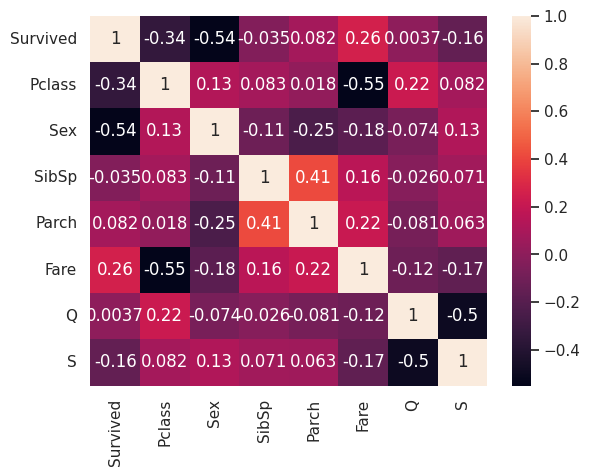

In [93]:
sns.heatmap(corr,annot=True)

<Axes: xlabel='Survived'>

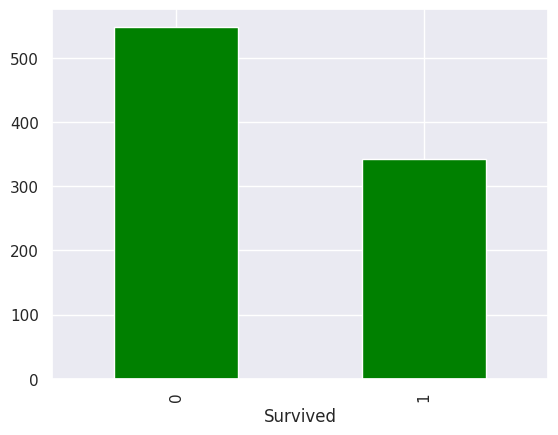

In [94]:
data['Survived'].value_counts().plot(kind='bar', color='green')

In [95]:
x = data.iloc[:,1:]
y= data.iloc[:,0]

In [96]:
x.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Q,S
0,3,1,1,0,7.2500,S,0,1
1,1,0,1,0,71.2833,C,0,0
2,3,0,0,0,7.9250,S,0,1
3,1,0,1,0,53.1000,S,0,1
4,3,1,0,0,8.0500,S,0,1


In [97]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [98]:
x.drop('Embarked', axis=1, inplace =True)

In [99]:
y.value_counts()

,count
Survived,
0,549
1,342


In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [101]:
x =pd.DataFrame(x)
x

,0,1,2,3,4,5,6
0,0.827377,0.737695,0.432793,-0.473674,-0.502445,-0.307562,0.619306
1,-1.566107,-1.355574,0.432793,-0.473674,0.786845,-0.307562,-1.614710
2,0.827377,-1.355574,-0.474545,-0.473674,-0.488854,-0.307562,0.619306
3,-1.566107,-1.355574,0.432793,-0.473674,0.420730,-0.307562,0.619306
4,0.827377,0.737695,-0.474545,-0.473674,-0.486337,-0.307562,0.619306
...,...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.474545,-0.473674,-0.386671,-0.307562,0.619306
887,-1.566107,-1.355574,-0.474545,-0.473674,-0.044381,-0.307562,0.619306
888,0.827377,-1.355574,0.432793,2.008933,-0.176263,-0.307562,0.619306
889,-1.566107,0.737695,-0.474545,-0.473674,-0.044381,-0.307562,-1.614710


In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [103]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3,random_state=101,stratify=y)

In [104]:
deci = DecisionTreeClassifier()
deci=deci.fit(x_train,y_train)

[Text(0.418359375, 0.9705882352941176, 'x[1] <= -0.309\ngini = 0.473\nsamples = 623\nvalue = [384, 239]'),
 Text(0.17727272727272728, 0.9117647058823529, 'x[0] <= 0.229\ngini = 0.374\nsamples = 233\nvalue = [58, 175]'),
 Text(0.2978160511363636, 0.9411764705882353, 'True  '),
 Text(0.06363636363636363, 0.8529411764705882, 'x[4] <= -0.067\ngini = 0.089\nsamples = 128\nvalue = [6, 122]'),
 Text(0.05454545454545454, 0.7941176470588235, 'x[4] <= -0.08\ngini = 0.185\nsamples = 58\nvalue = [6, 52]'),
 Text(0.045454545454545456, 0.7352941176470589, 'x[2] <= -0.021\ngini = 0.16\nsamples = 57\nvalue = [5, 52]'),
 Text(0.01818181818181818, 0.6764705882352942, 'x[4] <= -0.422\ngini = 0.097\nsamples = 39\nvalue = [2, 37]'),
 Text(0.00909090909090909, 0.6176470588235294, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.02727272727272727, 0.6176470588235294, 'x[4] <= -0.382\ngini = 0.059\nsamples = 33\nvalue = [1, 32]'),
 Text(0.01818181818181818, 0.5588235294117647, 'x[4] <= -0.39\ngini = 0.12

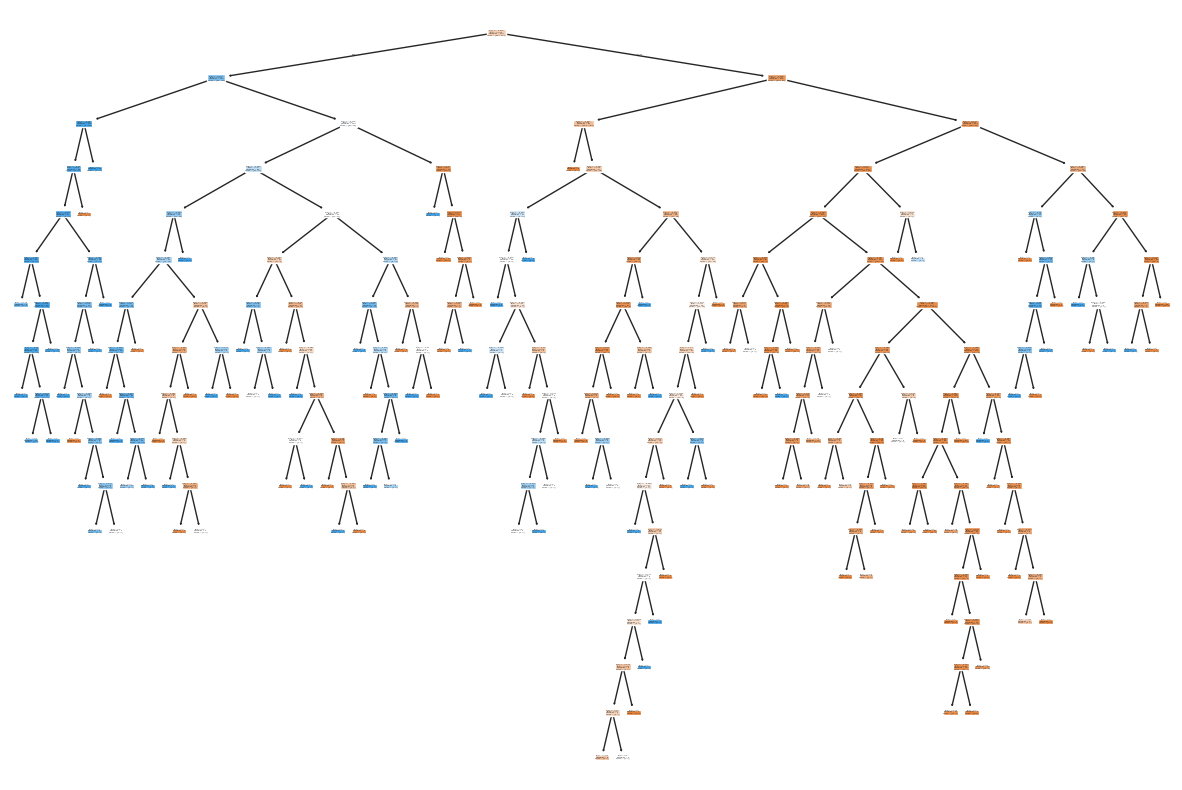

In [105]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(deci,filled=True)

In [106]:
y_Pred = deci.predict(x_test)
y_Pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0])

In [107]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, deci.predict(x_train))
print("Accuracy on Training Data:", accuracy_train)

accuracy_test = accuracy_score(y_test, y_Pred)
print("Accuracy on Test Data:", accuracy_test)

Accuracy on Training Data: 0.9373996789727127
Accuracy on Test Data: 0.7835820895522388


In [108]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(y_train,deci.predict(x_train)))
print()
print(confusion_matrix(y_test,y_Pred))

[[375   9]
 [ 30 209]]

[[150  15]
 [ 43  60]]


In [109]:
print(classification_report(y_train,deci.predict(x_train)))
print()
print(classification_report(y_test,y_Pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       384
           1       0.96      0.87      0.91       239

    accuracy                           0.94       623
   macro avg       0.94      0.93      0.93       623
weighted avg       0.94      0.94      0.94       623


              precision    recall  f1-score   support

           0       0.78      0.91      0.84       165
           1       0.80      0.58      0.67       103

    accuracy                           0.78       268
   macro avg       0.79      0.75      0.76       268
weighted avg       0.79      0.78      0.78       268



In [110]:
prune=DecisionTreeClassifier(max_depth=5, max_leaf_nodes=25, random_state=101)

prune_tree = prune.fit(x_train,y_train)

In [111]:
pred_prune = prune_tree.predict(x_test)

[Text(0.409375, 0.9166666666666666, 'x[1] <= -0.309\ngini = 0.473\nsamples = 623\nvalue = [384, 239]'),
 Text(0.18125, 0.75, 'x[0] <= 0.229\ngini = 0.374\nsamples = 233\nvalue = [58, 175]'),
 Text(0.2953125, 0.8333333333333333, 'True  '),
 Text(0.1, 0.5833333333333334, 'x[4] <= -0.067\ngini = 0.089\nsamples = 128\nvalue = [6, 122]'),
 Text(0.075, 0.4166666666666667, 'x[4] <= -0.08\ngini = 0.185\nsamples = 58\nvalue = [6, 52]'),
 Text(0.05, 0.25, 'x[2] <= -0.021\ngini = 0.16\nsamples = 57\nvalue = [5, 52]'),
 Text(0.025, 0.08333333333333333, 'gini = 0.097\nsamples = 39\nvalue = [2, 37]'),
 Text(0.075, 0.08333333333333333, 'gini = 0.278\nsamples = 18\nvalue = [3, 15]'),
 Text(0.1, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.125, 0.4166666666666667, 'gini = 0.0\nsamples = 70\nvalue = [0, 70]'),
 Text(0.2625, 0.5833333333333334, 'x[4] <= -0.178\ngini = 0.5\nsamples = 105\nvalue = [52, 53]'),
 Text(0.2, 0.4166666666666667, 'x[6] <= -0.498\ngini = 0.48\nsamples = 85\nvalue = [3

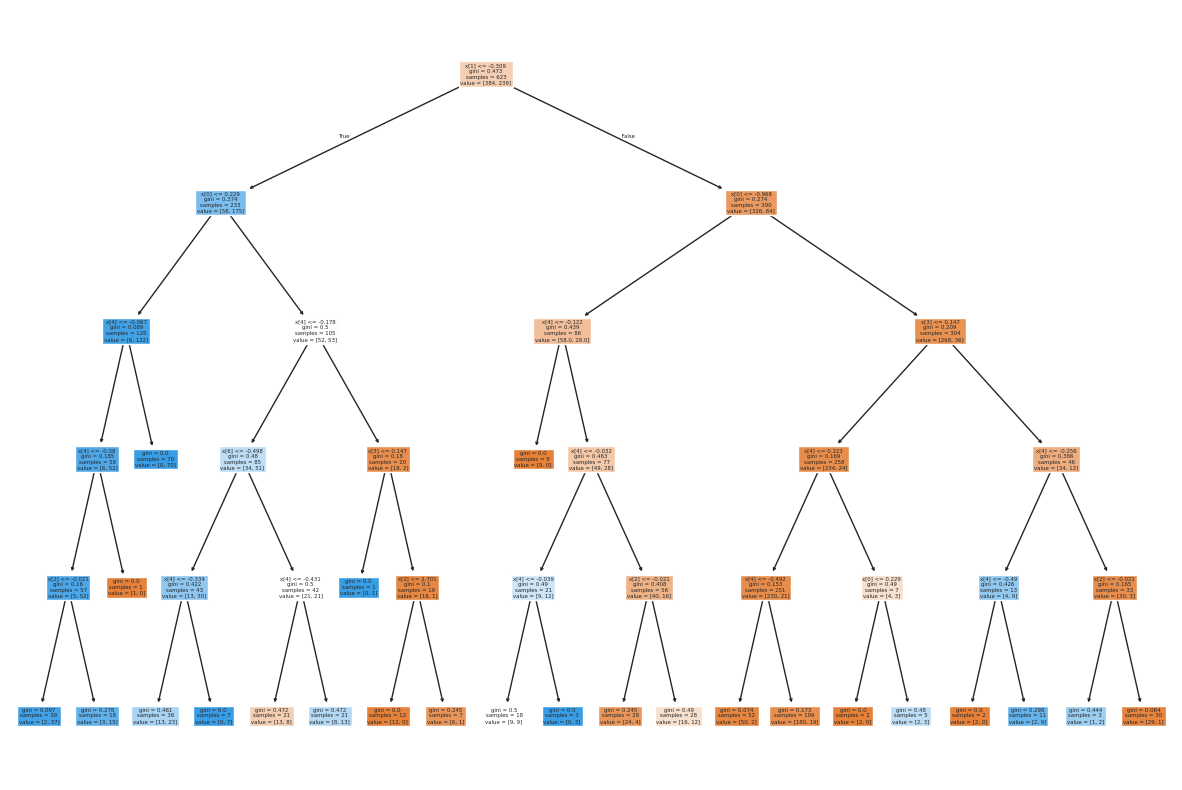

In [112]:
plt.figure(figsize=(15,10))
tree.plot_tree(prune_tree,filled=True)

In [113]:
print(confusion_matrix(y_train,prune_tree.predict(x_train)))
print()
print(confusion_matrix(y_test,pred_prune))

[[353  31]
 [ 56 183]]

[[151  14]
 [ 47  56]]


In [114]:
accuracy_train = accuracy_score(y_train, prune_tree.predict(x_train))
print("Accuracy on Training Data:", accuracy_train)

accuracy_test = accuracy_score(y_test, pred_prune)
print("Accuracy on Test Data:", accuracy_test)

Accuracy on Training Data: 0.8603531300160514
Accuracy on Test Data: 0.7723880597014925


In [115]:
input_data = (0.827377,0.737695,0.432793,-0.473674,-0.502445,-0.307562,0.619306)

input_data_array = np.asarray(input_data)

input_data_array_reshaped = input_data_array.reshape(1,-1)

pred = prune_tree.predict(input_data_array_reshaped)

print(pred)

if (pred[0] ==0):
    print('THE PASSANGER HAS NOT SURVIVED')
else:
    print('THE PASSANGER HAS SURVIED')

[0]
THE PASSANGER HAS NOT SURVIVED
